In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (17,7)

warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.shape

(5000, 7)

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.drop('Address', axis = 1, inplace = True)
df.count()

,0
Avg. Area Income,5000
Avg. Area House Age,5000
Avg. Area Number of Rooms,5000
Avg. Area Number of Bedrooms,5000
Area Population,5000
Price,5000


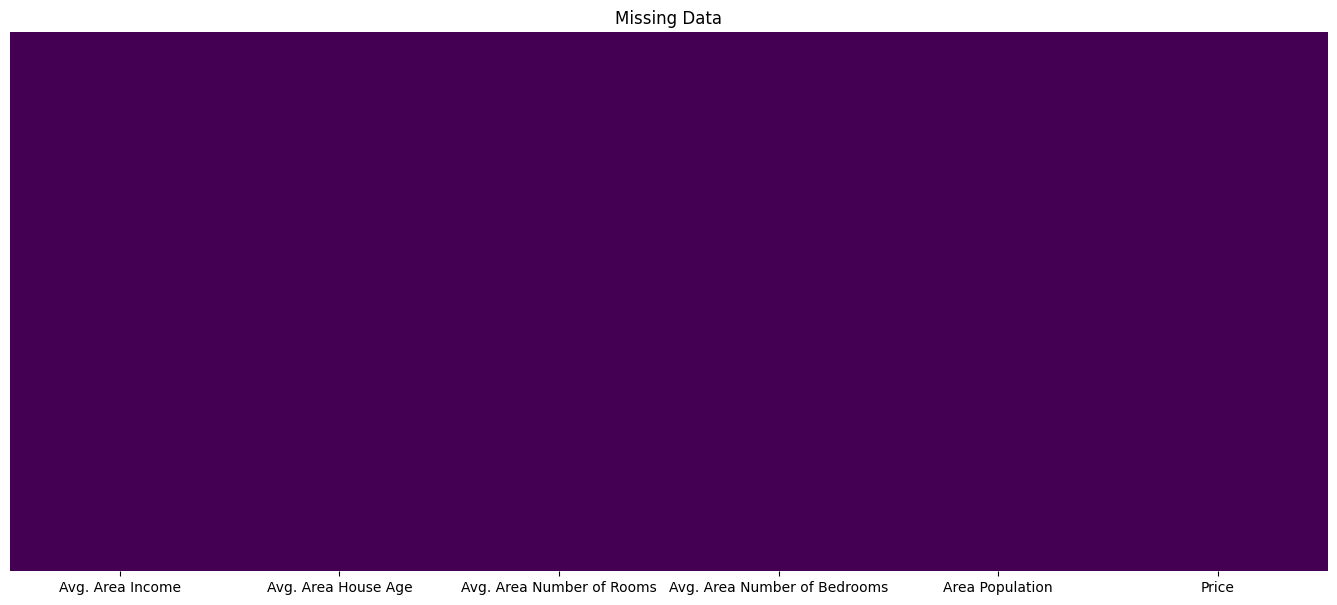

In [6]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'viridis')
plt.title("Missing Data")
plt.show()



In [7]:
df.dropna(inplace = True)

In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [9]:
# split data into train and test so that we can give to the model
# create matrix of features

x = df.drop('Price', axis = 1) #drop target variable

y = df['Price'] #target

In [33]:
# new setps
from sklearn import preprocessing

# for x
xpre_process = preprocessing.StandardScaler().fit(x)

x_transform = xpre_process.fit_transform(x)

# for y
y_reshaped = y.values.reshape(-1,1)
ypre_process = preprocessing.StandardScaler().fit(y_reshaped)

y_transform = ypre_process.fit_transform(y_reshaped)

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x_transform,y, test_size = .20,random_state = 101)

In [ ]:
df.shape

(5000, 6)

In [ ]:
x_train.shape

(4000, 5)

In [ ]:
x_test.shape

(1000, 5)

In [ ]:
y_train.shape

(4000,)

In [ ]:
y_train

,Price
3413,1.305210e+06
1610,1.400961e+06
3459,1.048640e+06
4293,1.231157e+06
1039,1.391233e+06
...,...
4171,7.296417e+05
599,1.599479e+06
1361,1.102641e+06
1547,8.650995e+05


In [ ]:
y_test.shape

(1000,)

In [ ]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [ ]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049
...,...,...,...,...,...
3900,77615.851343,6.200603,6.909327,2.27,36591.523448
3753,66925.199349,5.153050,8.396903,3.16,42590.685170
3582,71778.026176,5.921280,7.411045,4.00,37634.041316
2392,87272.093393,5.025866,7.184765,5.39,7522.333138


In [35]:
# fit
# import model
from sklearn.linear_model import LinearRegression

# create instance of model
reg = LinearRegression()

# pass training data into model
        #input   Output
reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_train

,Price
3413,1.305210e+06
1610,1.400961e+06
3459,1.048640e+06
4293,1.231157e+06
1039,1.391233e+06
...,...
4171,7.296417e+05
599,1.599479e+06
1361,1.102641e+06
1547,8.650995e+05


In [36]:
# predict
y_pred = reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(1000,)
[1257919.72909701  822112.41884176 1740669.05865509  972452.12917479
  993422.26329292  644126.07414431 1073911.7910164   856584.00194141
 1445318.25518372 1204342.19071214 1455792.46212894 1298556.65696451
 1735924.33836104 1336925.77577778 1387637.43231928 1222403.77772052
  613786.28691938  963933.54416253 1221197.33050132 1198071.57563599
  505861.89531635 1769106.54723384 1853881.16842504 1200369.50507893
 1065129.12850721 1812033.73067346 1768686.47091279 1439920.83814321
 1387251.9964939  1541178.39224186  726418.80504233 1754497.60908684
 1462185.72653163 1025600.16081117 1284926.86851559  917454.59590873
 1187046.94956896  999330.91117487 1329536.63409608  782191.6044142
 1393272.03053858  578216.88394869  822643.37151015 1895533.11413239
 1672019.84892042  966926.45434591 1129674.55638148  792797.75914644
 1161057.18412151 1472396.71417146 1457656.70412287 1162939.33422896
 1099453.68110994 1358107.44619388  841103.70380549  986322.30573623
 1123323.5300213  1253538.6

Text(0, 0.5, 'Predicted Price')

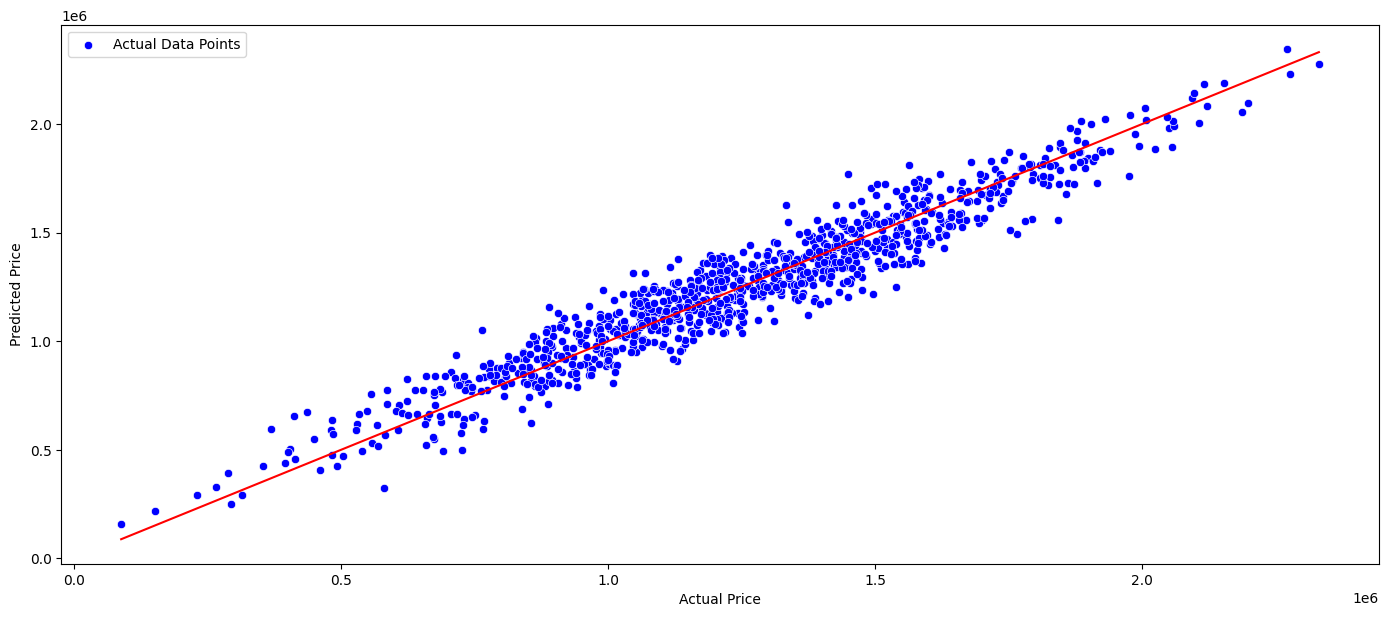

In [37]:
sns.scatterplot( x = y_test,y = y_pred,color = "blue", label = "Actual Data Points")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color = 'red',label = "Ideal Line")
# plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [38]:
# printing the values       actual , pridicted
results = np.column_stack((y_test,y_pred))
for actual,predict in results:
    print(f"{actual:14.2f} | {predict:12.2f}")


    1251688.62 |   1257919.73
     873048.32 |    822112.42
    1696977.66 |   1740669.06
    1063964.29 |    972452.13
     948788.28 |    993422.26
     730043.65 |    644126.07
    1166925.15 |   1073911.79
     705444.12 |    856584.00
    1499988.88 |   1445318.26
    1288199.15 |   1204342.19
    1441736.76 |   1455792.46
    1279681.15 |   1298556.66
    1754969.16 |   1735924.34
    1511653.45 |   1336925.78
    1441956.20 |   1387637.43
    1119992.62 |   1222403.78
     727866.53 |    613786.29
    1138885.10 |    963933.54
    1074263.32 |   1221197.33
    1386473.37 |   1198071.58
     404643.60 |    505861.90
    1449829.49 |   1769106.55
    1775874.76 |   1853881.17
    1202050.58 |   1200369.51
    1105737.46 |   1065129.13
    1835564.69 |   1812033.73
    1795428.77 |   1768686.47
    1424283.37 |   1439920.84
    1365945.08 |   1387252.00
    1492011.50 |   1541178.39
     624432.97 |    726418.81
    1827476.20 |   1754497.61
    1575680.04 |   1462185.73
    105151

In [40]:
# score it
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("Linear Regression Model")
print("--"*30)
#mean squared error
mse = mean_squared_error(y_test,y_pred)

#mean square root
rmsr = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

print(f'Mean Squared Error : {mse}')
print(f'Root Mean Squared Error : {rmsr}')
print(f'Mean Absolute Error : {mae}')

Linear Regression Model
------------------------------------------------------------
Mean Squared Error : 10100187858.867598
Root Mean Squared Error : 100499.69083966178
Mean Absolute Error : 81305.23300086232


In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install pydantic-settings

In [ ]:
import pandas_profiling as pp

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.9/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.9/u/import-error

In [ ]:
!pip install --upgrade pandas-profiling
# or, if you prefer to downgrade pydantic to an earlier compatible version:
# !pip install pydantic==1.10.10
#  (Choose an appropriate version that is compatible with pandas-profiling)


import pandas_profiling as pp # Import the library after upgrading it

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.9/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.9/u/import-error